## XGBOOST

In [24]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# ingnoring warning

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Reading the dataset

df=pd.read_csv('alzheimer.csv')
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [27]:
# Shape 

print('Shape: ',df.shape)

Shape:  (373, 10)


### FUTURE ENGINEERING

In [28]:
# Checking removing null values

df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [29]:
# Replacing missing values with median



df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [30]:
# Checking duplicated values

df.duplicated().sum()

0

In [31]:
# Using label encoder on target feature

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Group']=le.fit_transform(df['Group']).astype(int)
df['M/F']=le.fit_transform(df['M/F']).astype(int)
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [32]:
# Checking dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int32  
 1   M/F     373 non-null    int32  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 26.4 KB


In [33]:
# Splitting the data into x and y

X=df.drop(columns='Group', axis=1)
y=df.loc[:,'Group']

In [34]:
X.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [35]:
y.head()

0    2
1    2
2    1
3    1
4    1
Name: Group, dtype: int32

In [36]:
# Shape after splitting

print('X_Shape: ',X.shape)
print('Y_Shape: ',y.shape)

X_Shape:  (373, 9)
Y_Shape:  (373,)


In [37]:
# Since data is imbalanced
# Trying over sampling

from imblearn.over_sampling import RandomOverSampler

rs=RandomOverSampler()
X,y=rs.fit_resample(X,y)

X.shape,y.shape

((570, 9), (570,))

In [38]:
# Shape after over sampling

print('X_Shape: ',X.shape)
print('Y_Shape: ',y.shape)

X_Shape:  (570, 9)
Y_Shape:  (570,)


### MODEL DEPLOYMENT

In [39]:
### Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((399, 9), (171, 9), (399,), (171,))

In [40]:
# Randomly selecting features
import random

random.seed(42)  # Setting seed for reproducibility
selected_features = random.sample(list(X.columns), k=3)  # Selecting 3 features randomly
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [41]:
### XGBoost

from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train_selected,y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
# y_predict

y_predict=xgb.predict(X_test_selected)

In [43]:
# metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)
precision=precision_score(y_test, y_predict, average='micro')
recall=recall_score(y_test,y_predict, average='micro')
accuracy=accuracy*100

print('accuracy: {}\n\n\nclassification report:\n {}\n\n\nconfusion matrix:\n {}\n\n\nprecision: {}\n\n\nrecall: {}'.format(accuracy,cr,cm,precision,recall))

accuracy: 75.43859649122807


classification report:
               precision    recall  f1-score   support

           0       0.57      0.83      0.67        52
           1       0.96      0.72      0.82        60
           2       0.86      0.73      0.79        59

    accuracy                           0.75       171
   macro avg       0.79      0.76      0.76       171
weighted avg       0.80      0.75      0.76       171



confusion matrix:
 [[43  2  7]
 [17 43  0]
 [16  0 43]]


precision: 0.7543859649122807


recall: 0.7543859649122807


Confusion matrix:
[[43  2  7]
 [17 43  0]
 [16  0 43]]


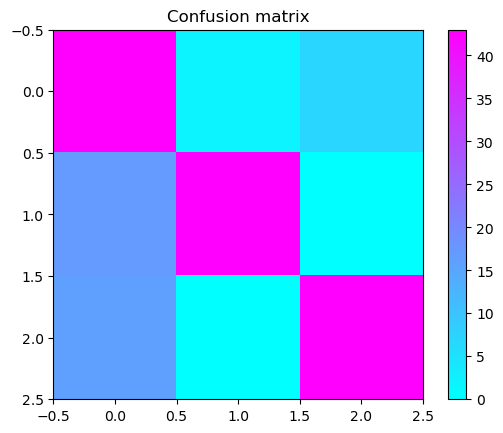

In [44]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, y_predict)
print('Confusion matrix:')
print(cm)
plot_confusion_matrix(cm)